# Ideas for analysis
* Counts of columns
    * info and describe on dfs
* Plot missing values
* number of census tracts/counties
* Pull SDOH for UofU and maybe another address?

## Importing Data

In [1]:
# Set up
import pandas as pd

# for plots
#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

# View max columns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format) #Causes pandas do NOT output integers as exponents

In [2]:
# 1) Figure out the location of this script or notebook:
from pathlib import Path

BASE_DIR = Path.cwd()  # The current working directory is the repository root
# 2) Point to your data folders:
DATA_DIR = BASE_DIR / "Data Files"
GEO_DIR = BASE_DIR / "GeoFiles"

# Create df of the final CSV
csv_name = "one_df_to_rule_them_all.csv"
df = pd.read_csv(DATA_DIR / csv_name)

## Information on the DF

In [3]:
# Viewing the DF
print("Dimensions of the DF:",df.shape)

print("Column names:",df.columns.to_list())

df.head()

Dimensions of the DF: (716, 38)
Column names: ['GEOID20', 'ACS_PCT_CTZ_US_BORN', 'ACS_PCT_FOREIGN_BORN', 'ACS_PCT_WHITE', 'ACS_PCT_NONHISP', 'ACS_MEDIAN_HH_INC', 'ACS_PCT_OWNER_HU', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_RENTER_HU', 'ACS_PCT_RENTER_HU_COST_30PCT', 'ACS_PCT_VACANT_HU', 'ACS_PCT_UNEMPLOY', 'ACS_PCT_UNINSURED', 'ACS_PCT_PERSON_INC_BELOW99', 'ACS_GINI_INDEX', 'PCT_EDUCATION_WT_AVG', 'CASTHMA_PCT', 'RPL_THEMES', 'EP_LIMENG', 'UA_POP', 'NAT_WALK_IND', 'STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'NAME20', 'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'POP100', 'HU100', 'geometry', 'FIPS', 'Total Cancer Risk (per million)', 'TCRPM']


,GEOID20,ACS_PCT_CTZ_US_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_WHITE,ACS_PCT_NONHISP,ACS_MEDIAN_HH_INC,ACS_PCT_OWNER_HU,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_RENTER_HU,ACS_PCT_RENTER_HU_COST_30PCT,ACS_PCT_VACANT_HU,ACS_PCT_UNEMPLOY,ACS_PCT_UNINSURED,ACS_PCT_PERSON_INC_BELOW99,ACS_GINI_INDEX,PCT_EDUCATION_WT_AVG,CASTHMA_PCT,RPL_THEMES,EP_LIMENG,UA_POP,NAT_WALK_IND,STATEFP20,COUNTYFP20,TRACTCE20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,POP100,HU100,geometry,FIPS,Total Cancer Risk (per million),TCRPM
0,49001100100,95,5,96,91,67411,83,9,17,30,31,1,13,3,0,3,0,1,1,NaN,8,49,1,100100,1001,Census Tract,G5020,S,1357843756,830378,38,-113,4426,1804,"POLYGON ((-12556266.9956 4621868.7136999965, -...",49001,10,10
1,49001100200,89,11,89,84,61359,80,12,20,31,22,6,8,5,0,3,0,1,5,NaN,7,49,1,100200,1002,Census Tract,G5020,S,5331838094,4468088,38,-113,2646,1059,"POLYGON ((-12696046.5685 4649808.7903999975, -...",49001,10,10
2,49003960100,97,3,97,98,67297,90,15,10,38,23,1,9,9,0,3,0,0,0,392,4,49,3,960100,9601,Census Tract,G5020,S,13531188545,2288660990,42,-113,3498,1311,POLYGON ((-12695100.499400001 5012572.93649999...,49003,100,100
3,49003960200,98,2,94,89,68940,80,11,20,48,7,5,8,8,0,3,0,1,0,2323,5,49,3,960200,9602,Census Tract,G5020,S,259446622,548733,42,-112,8037,2600,"POLYGON ((-12489514.854699997 5119967.9194, -1...",49003,100,100
4,49003960301,94,6,96,88,54508,71,11,29,45,3,3,7,8,0,3,NaN,1,1,3605,NaN,49,3,960301,9603,Census Tract,G5020,S,26001610,0,42,-112,4500,1492,"POLYGON ((-12486800.3279 5115244.041900001, -1...",49003,100,100


In [4]:
# Print structure and summary of the DataFrame
print("=== DataFrame Info ===")
df.info()

print("\n=== DataFrame Description ===")
display(df.describe(include='all'))  # Include all column types

# pull number of census tracts
if 'GEOID20' in df.columns:
    print(f"\nNumber of unique census tracts: {df['GEOID20'].nunique()}")

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   GEOID20                          716 non-null    int64  
 1   ACS_PCT_CTZ_US_BORN              710 non-null    float64
 2   ACS_PCT_FOREIGN_BORN             710 non-null    float64
 3   ACS_PCT_WHITE                    710 non-null    float64
 4   ACS_PCT_NONHISP                  710 non-null    float64
 5   ACS_MEDIAN_HH_INC                708 non-null    float64
 6   ACS_PCT_OWNER_HU                 709 non-null    float64
 7   ACS_PCT_OWNER_HU_COST_30PCT      704 non-null    float64
 8   ACS_PCT_RENTER_HU                709 non-null    float64
 9   ACS_PCT_RENTER_HU_COST_30PCT     705 non-null    float64
 10  ACS_PCT_VACANT_HU                709 non-null    float64
 11  ACS_PCT_UNEMPLOY                 709 non-null    float64
 12 

,GEOID20,ACS_PCT_CTZ_US_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_WHITE,ACS_PCT_NONHISP,ACS_MEDIAN_HH_INC,ACS_PCT_OWNER_HU,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_RENTER_HU,ACS_PCT_RENTER_HU_COST_30PCT,ACS_PCT_VACANT_HU,ACS_PCT_UNEMPLOY,ACS_PCT_UNINSURED,ACS_PCT_PERSON_INC_BELOW99,ACS_GINI_INDEX,PCT_EDUCATION_WT_AVG,CASTHMA_PCT,RPL_THEMES,EP_LIMENG,UA_POP,NAT_WALK_IND,STATEFP20,COUNTYFP20,TRACTCE20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,POP100,HU100,geometry,FIPS,Total Cancer Risk (per million),TCRPM
count,716,710,710,710,710,708,709,704,709,705,709,709,709,709,708,710,478,716,716,484,481,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716,716
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract,G5020,S,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((-12464800.466599999 5035602.94259999...,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716,716,716,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,49036853243,91,9,85,86,78489,71,19,29,41,8,4,9,10,0,3,0,-9,2,4488,11,49,37,205198,2052,NaN,NaN,NaN,297981926,9120094,40,-112,4569,1608,NaN,49037,268,268
std,15192575,7,7,13,12,28273,23,8,23,19,12,3,7,10,0,0,1,98,3,1866,4,0,15,293600,2936,NaN,NaN,NaN,1385664140,96392568,1,1,1772,629,NaN,15,318,318
min,49001100100,58,0,1,39,22367,0,0,0,0,0,0,0,0,0,2,0,-999,0,0,1,49,1,100,1,NaN,NaN,NaN,466832,0,37,-114,0,0,NaN,49001,10,10
25%,49035102802,88,4,82,81,58055,59,15,12,30,2,2,4,4,0,3,0,0,0,3290,8,49,35,10409,104,NaN,NaN,NaN,2001059,0,40,-112,3400,1188,NaN,49035,40,40
50%,49035113532,93,7,89,89,74507,77,19,23,42,5,3,8,7,0,3,0,0,1,4510,12,49,35,113012,1130,NaN,NaN,NaN,3700137,0,41,-112,4396,1568,NaN,49035,40,40
75%,49049003104,96,12,93,95,94556,88,23,41,54,9,5,12,13,0,3,0,1,3,5714,14,49,49,200202,2002,NaN,NaN,NaN,15001744,6446,41,-112,5584,1957,NaN,49049,700,700



Number of unique census tracts: 716


## Missing values

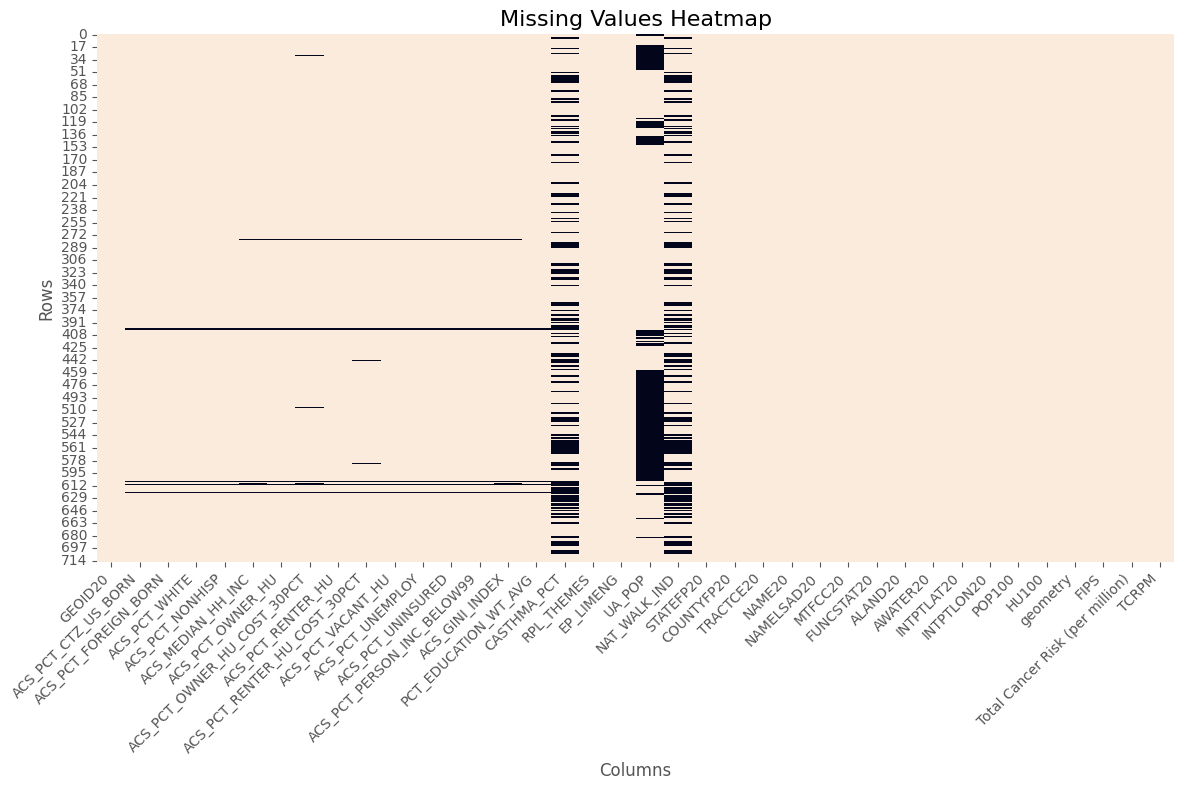

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Plot missing values heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="rocket_r")

# Add title and labels with fontsize
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)

# Rotate column labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
# Count of missing values per column
df.isnull().sum().sort_values(ascending=False)

CASTHMA_PCT                        238
NAT_WALK_IND                       235
UA_POP                             232
ACS_PCT_OWNER_HU_COST_30PCT         12
ACS_PCT_RENTER_HU_COST_30PCT        11
ACS_MEDIAN_HH_INC                    8
ACS_GINI_INDEX                       8
ACS_PCT_PERSON_INC_BELOW99           7
ACS_PCT_UNEMPLOY                     7
ACS_PCT_VACANT_HU                    7
ACS_PCT_OWNER_HU                     7
ACS_PCT_UNINSURED                    7
ACS_PCT_RENTER_HU                    7
ACS_PCT_CTZ_US_BORN                  6
PCT_EDUCATION_WT_AVG                 6
ACS_PCT_NONHISP                      6
ACS_PCT_FOREIGN_BORN                 6
ACS_PCT_WHITE                        6
GEOID20                              0
RPL_THEMES                           0
EP_LIMENG                            0
STATEFP20                            0
COUNTYFP20                           0
TRACTCE20                            0
NAME20                               0
NAMELSAD20               

In [7]:
# Missing data per county
df['COUNTYFP20'].value_counts().sort_values(ascending=False)

COUNTYFP20
35    251
49    156
11     66
57     58
53     35
5      28
45     17
43     14
3      12
21     12
51     10
47      8
39      7
7       5
41      5
37      4
13      4
27      3
19      3
15      3
29      3
1       2
25      2
17      2
23      2
9       1
33      1
31      1
55      1
Name: count, dtype: int64

35 - Salt Lake County  
49 - Utah County  
11 - Davis County  
57 - Weber County  
53 - Washington County  

The distribution of missing data in the 'COUNTYFP20' column appears to correlate with the population of the respective counties, indicating a higher frequency of missing values in more populous areas.

## SDOH Examples

### Distributions

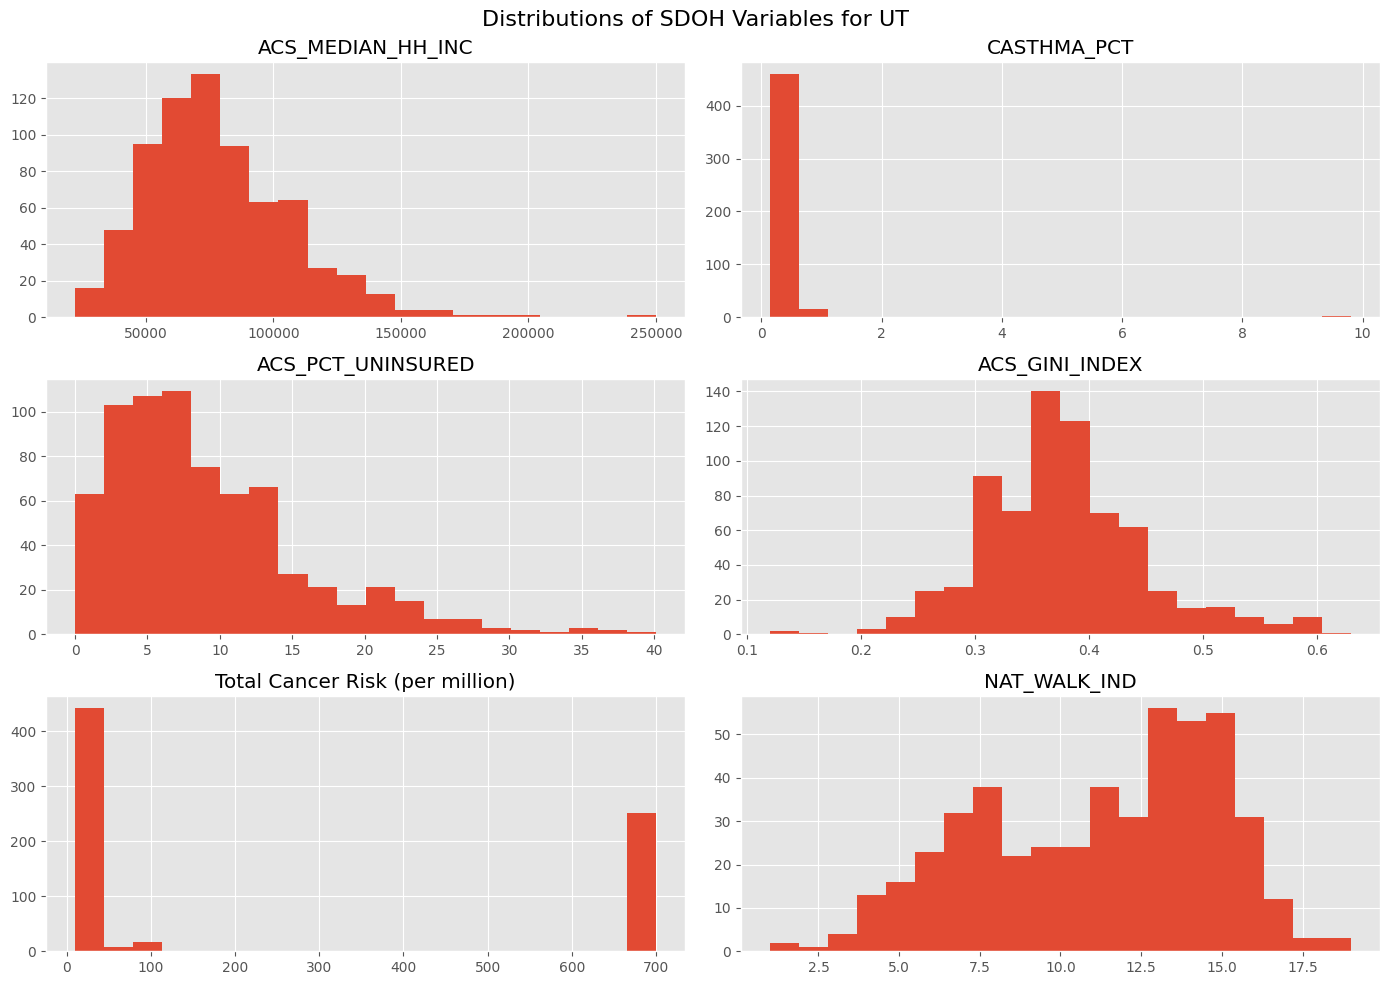

In [8]:
# Distributions of some SDOH Variables

sdoh_columns = [
    "ACS_MEDIAN_HH_INC",
    "CASTHMA_PCT",
    "ACS_PCT_UNINSURED",
    "ACS_GINI_INDEX",
    "Total Cancer Risk (per million)",
    "NAT_WALK_IND"
]

df[sdoh_columns].hist(bins=20, figsize=(14, 10), layout=(3, 2))
plt.suptitle("Distributions of SDOH Variables for UT", fontsize=16)
plt.tight_layout()
plt.show()

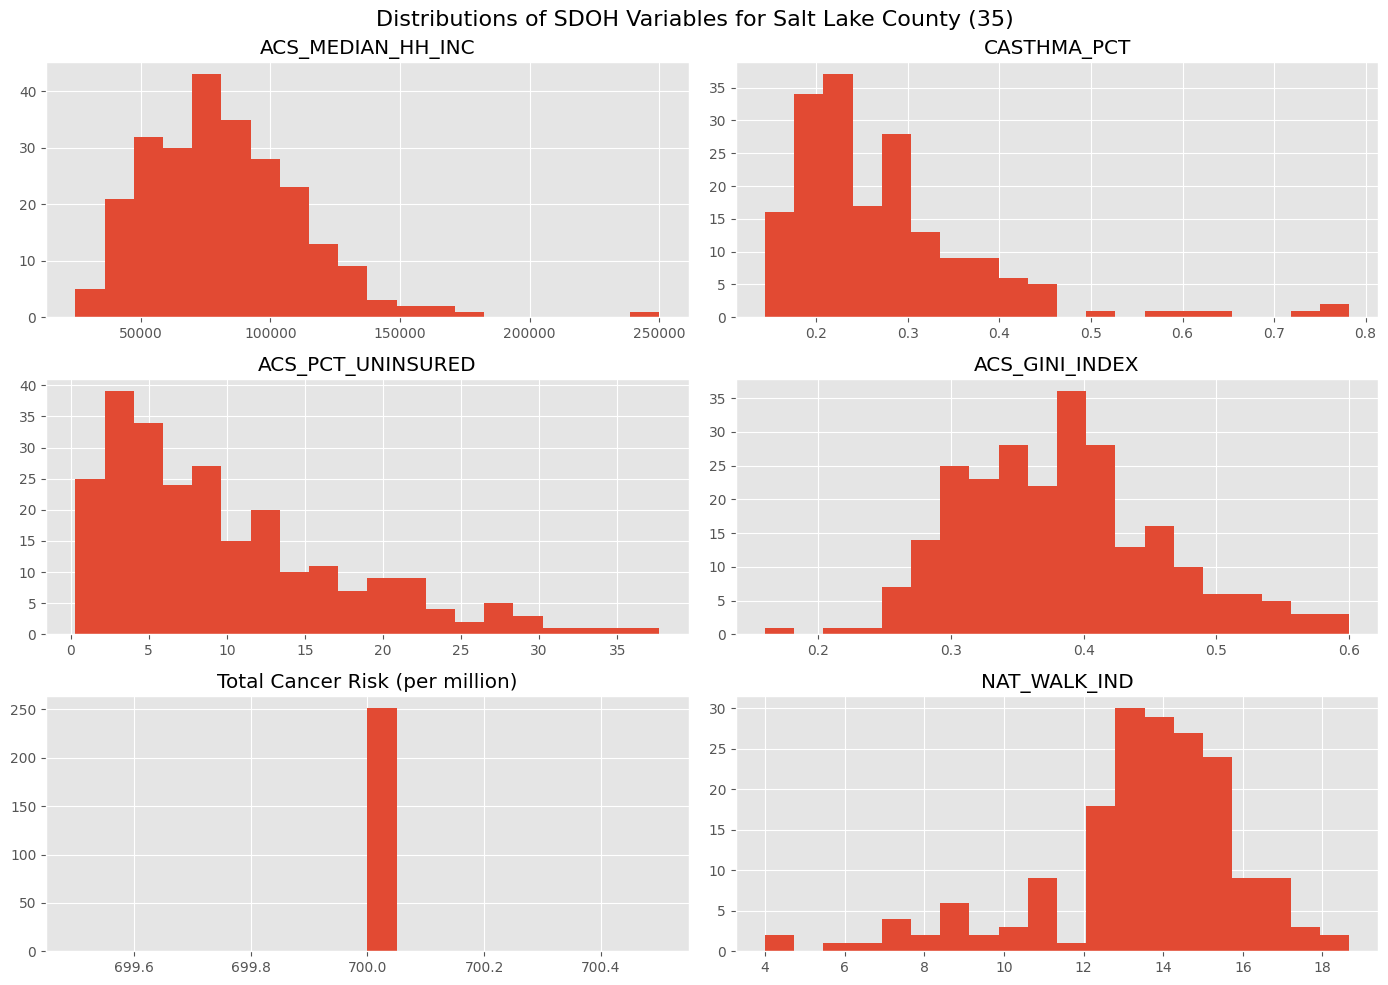

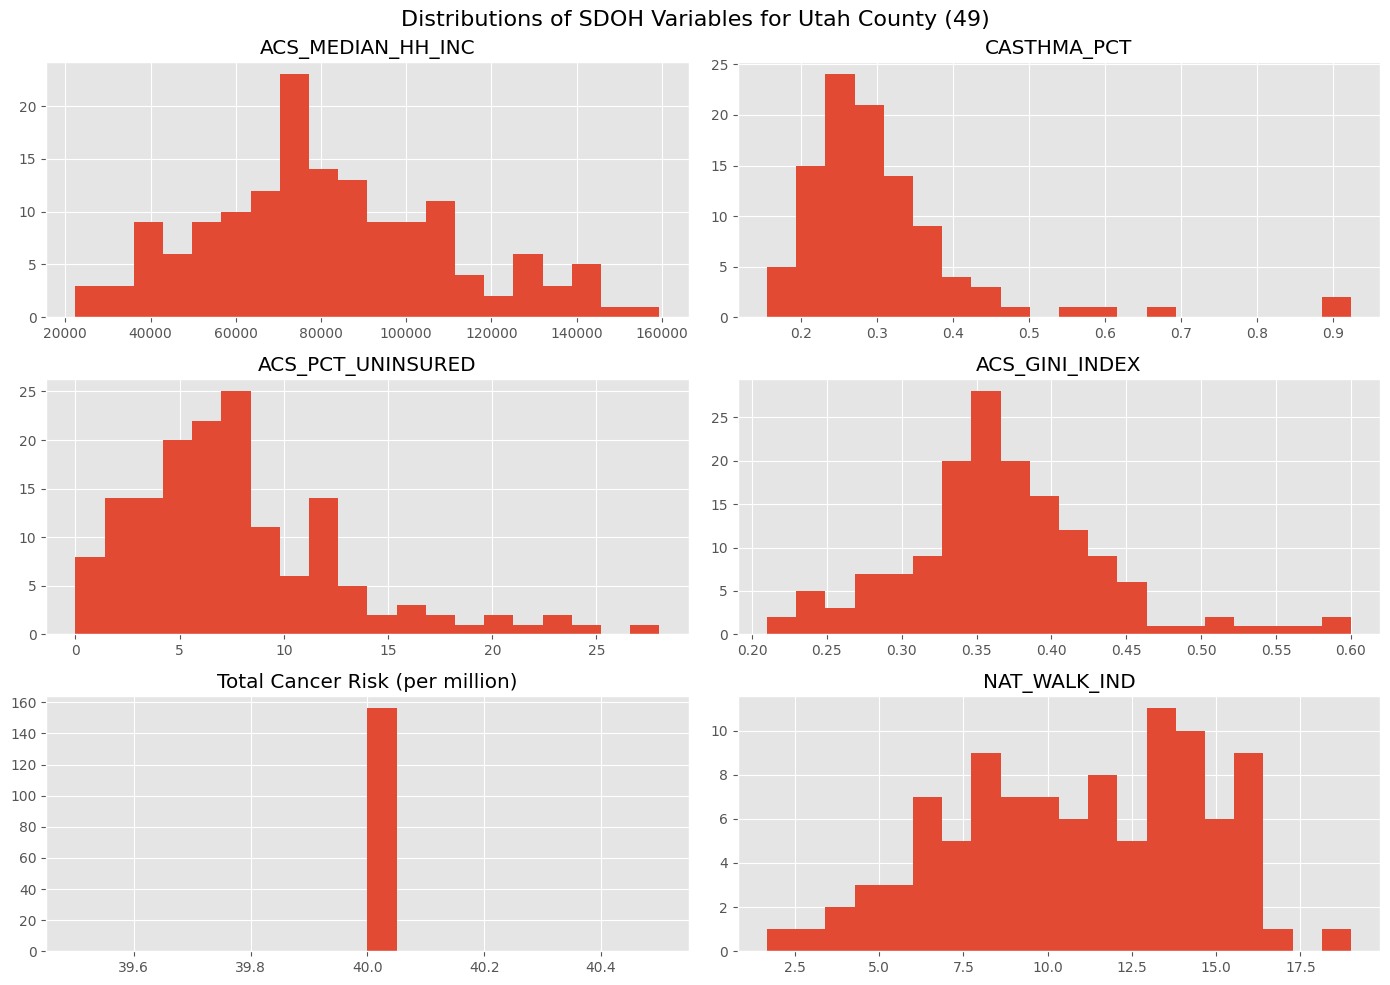

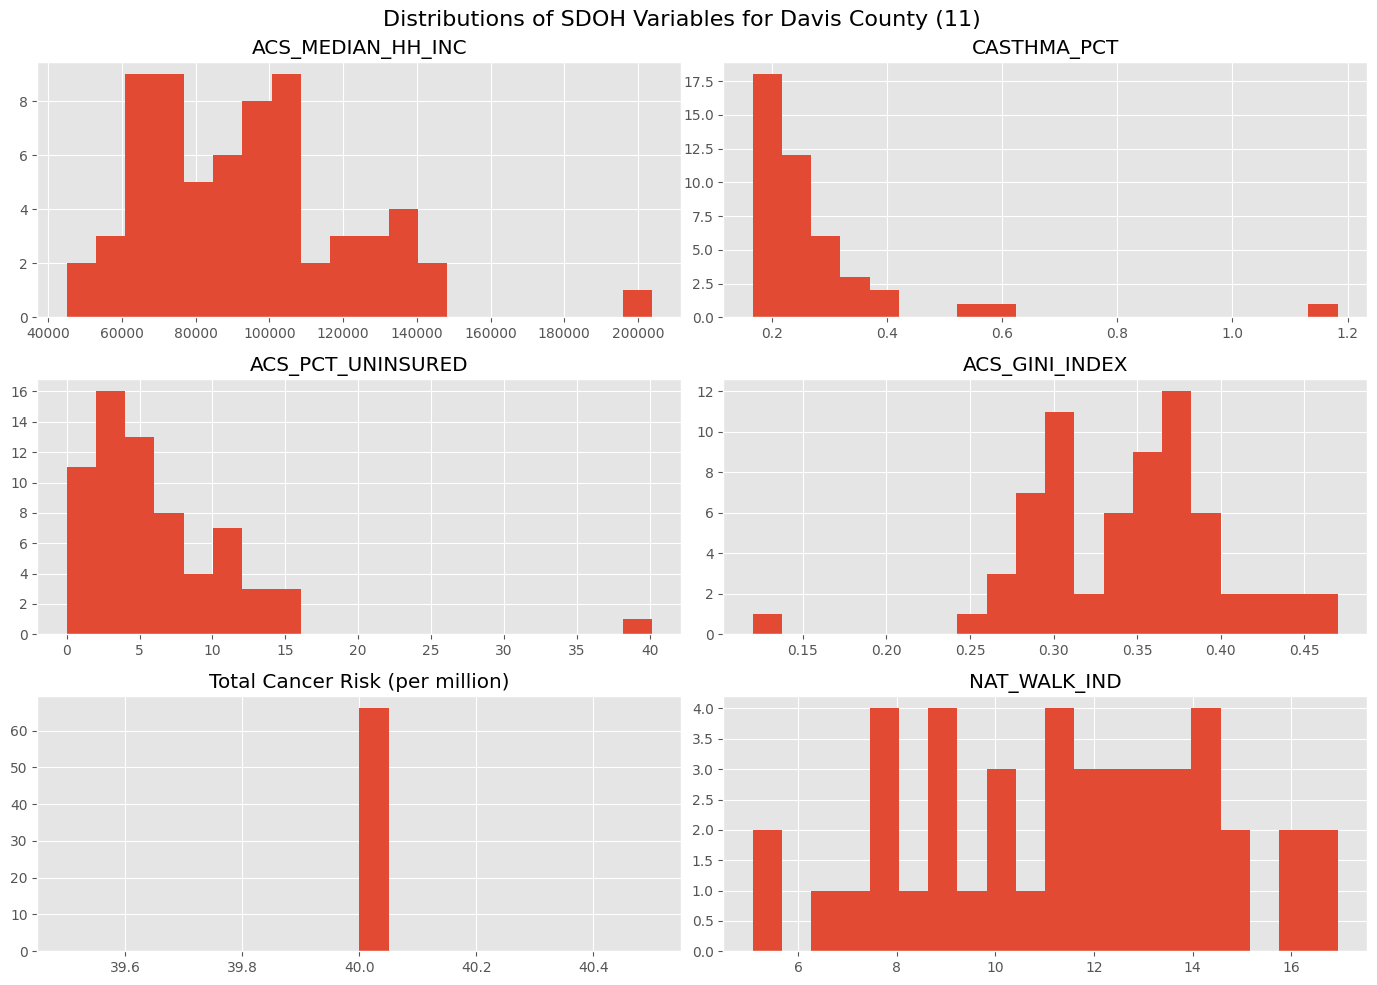

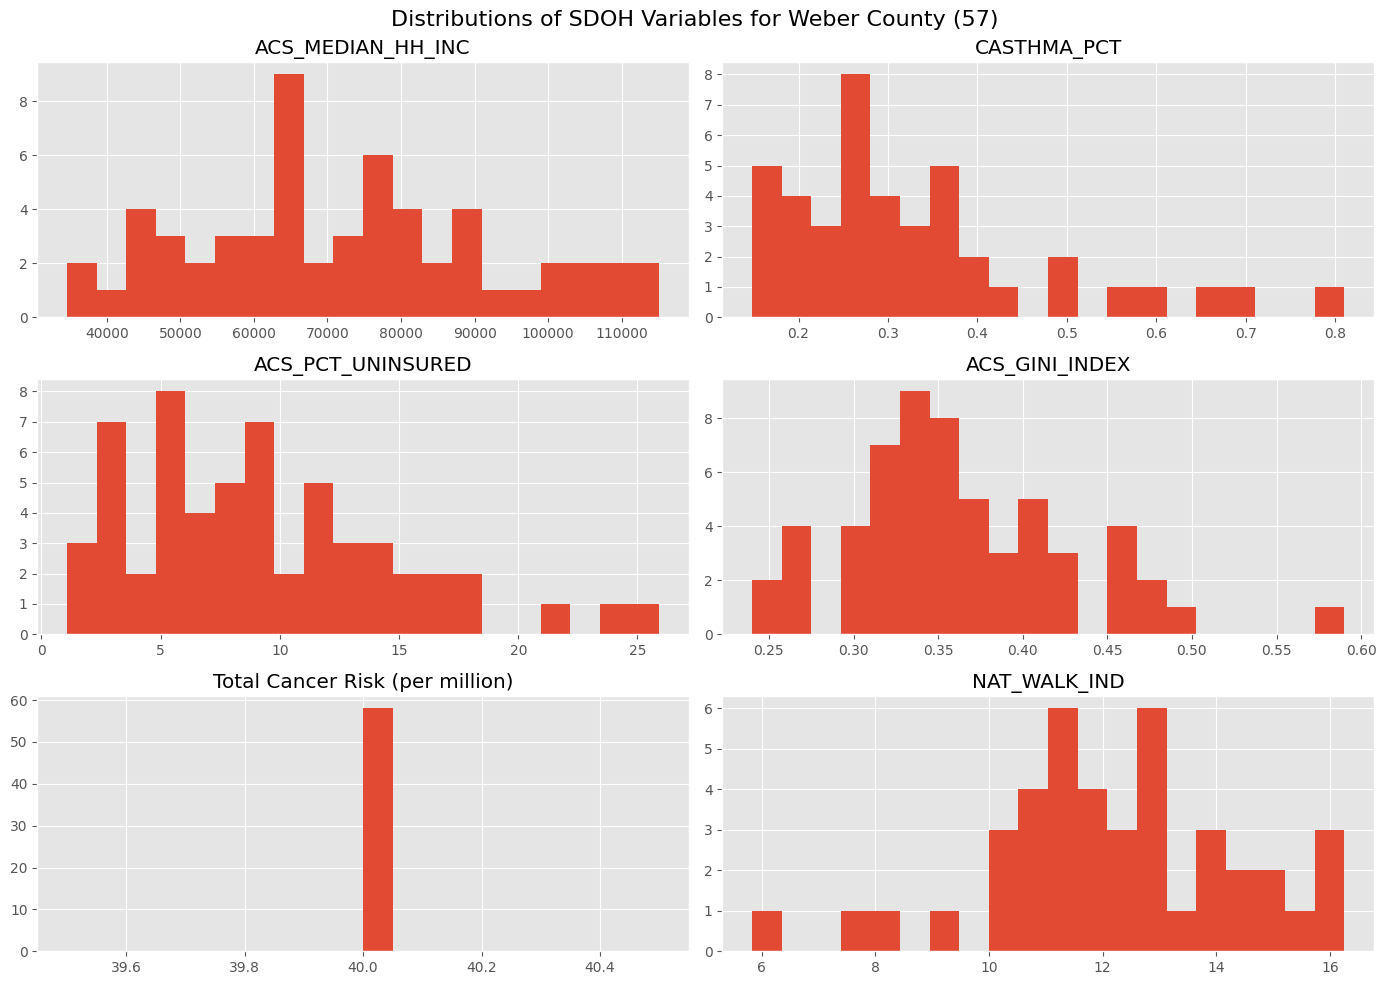

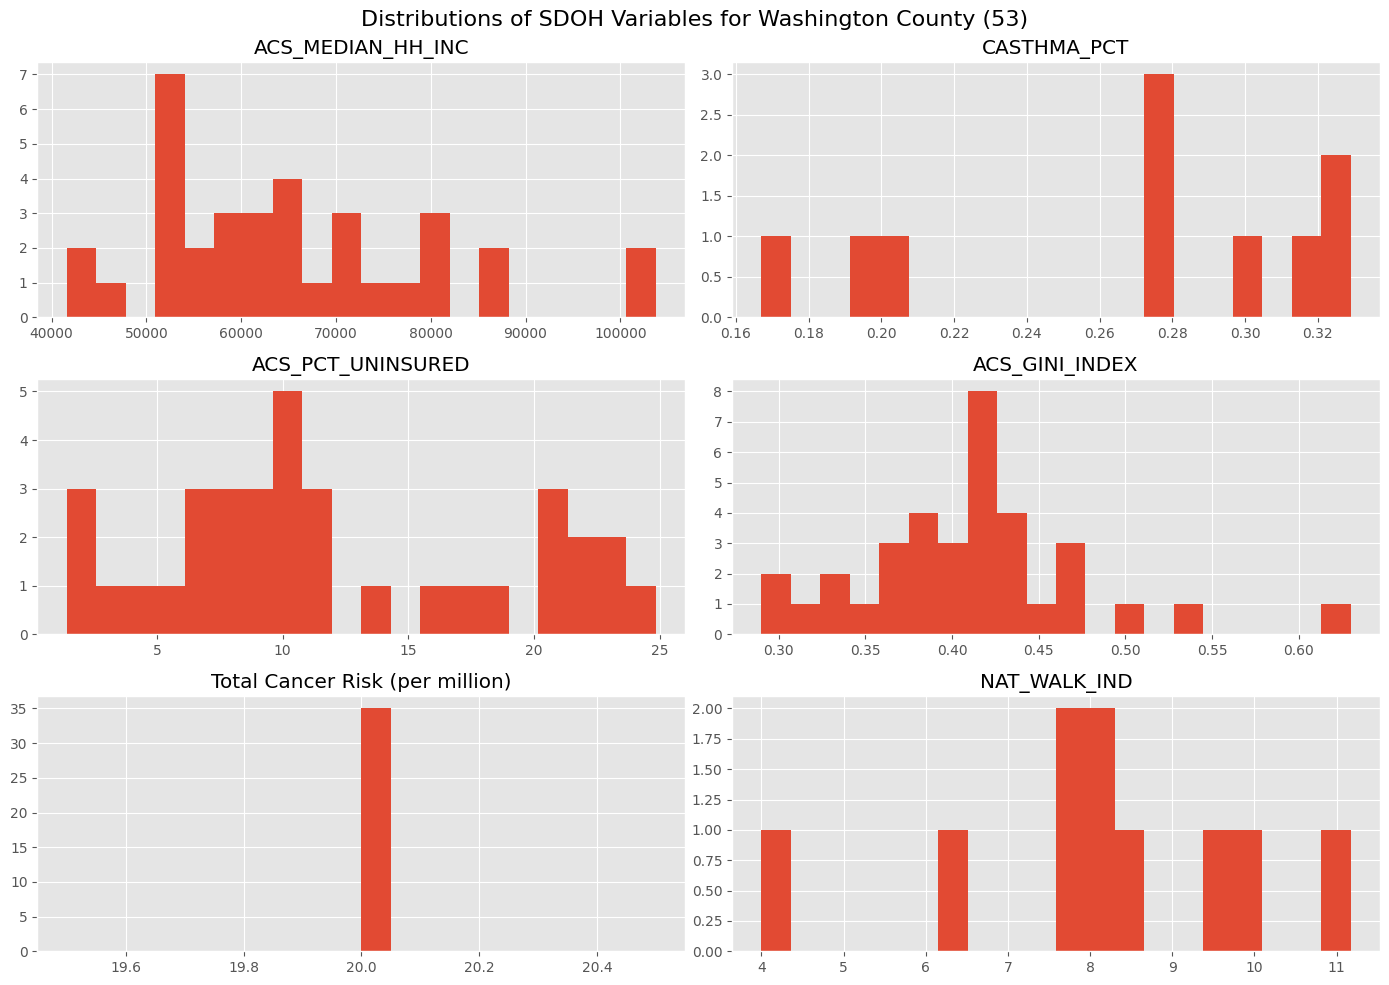

In [9]:
county_column = 'COUNTYFP20'  # The column containing county identifiers
counties_of_interest = [35, 49, 11, 57, 53]  # List of the desired counties

# Dictionary to map FIPS code to county name
county_name_mapping = {
    35: "Salt Lake County",
    49: "Utah County",
    11: "Davis County",
    57: "Weber County",
    53: "Washington County"
}

sdoh_columns = [
    "ACS_MEDIAN_HH_INC",
    "CASTHMA_PCT",
    "ACS_PCT_UNINSURED",
    "ACS_GINI_INDEX",
    "Total Cancer Risk (per million)",
    "NAT_WALK_IND"
]

for county_fips in counties_of_interest:
    county_df = df[df[county_column] == county_fips]  # Filter for the county

    if not county_df.empty:  # Check if there's data for the county
        county_df[sdoh_columns].hist(bins=20, figsize=(14, 10), layout=(3, 2))
        county_name = county_name_mapping.get(county_fips, f"County {county_fips}")
        plt.suptitle(f"Distributions of SDOH Variables for {county_name} ({county_fips})", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for county FIPS: {county_fips}")

### UofU Example (coordinates)

In [10]:
# Example for UofU

#!pip install geopandas
import geopandas as gpd
from geopy.distance import geodesic
from shapely.geometry import Point

# Get coordinates: https://gps-coordinates.org/coordinate-converter.php
# Latitude and Longitude of UofU (40.7633406, -111.8389106)

In [11]:
def get_sdoh_for_coordinates(latitude, longitude, geo_files_path="GeoFiles", sdoh_df=None):
    if sdoh_df is None:
        raise ValueError("An SDOH DataFrame must be provided.")
    if "GEOID20" not in sdoh_df.columns:
        raise ValueError("SDOH DataFrame must contain a 'GEOID20' column.")

    geo_dir = Path(geo_files_path)
    tracts_file = geo_dir / "CensusTracts2020.shp"

    try:
        if not tracts_file.exists():
            raise FileNotFoundError(f"Census Tracts shapefile not found: {tracts_file}")

        tracts_gdf = gpd.read_file(tracts_file)
        tracts_gdf = tracts_gdf.to_crs("EPSG:4326")
        tracts_gdf["GEOID20"] = tracts_gdf["GEOID20"].astype(str)

        point = Point(longitude, latitude)
        point_gdf = gpd.GeoDataFrame([1], geometry=[point], crs="EPSG:4326")

        joined = gpd.sjoin(point_gdf, tracts_gdf, how="left", predicate="within")

        if joined.empty or pd.isna(joined['GEOID20'].iloc[0]):
            return None

        result = joined.iloc[0]
        geoid20 = str(result['GEOID20'])

        # Match and merge with SDOH
        sdoh_df["GEOID20"] = sdoh_df["GEOID20"].astype(str)
        match = sdoh_df[sdoh_df["GEOID20"] == geoid20]

        if not match.empty:
            sdoh_data = match.squeeze()
            result = pd.concat([pd.Series([geoid20], index=['GEOID20']), result.drop('GEOID20'), sdoh_data.drop('GEOID20')])
        else:
            print(f"GEOID20 '{geoid20}' not found in SDOH DataFrame.")

        return result

    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [12]:
latitude_uofu = 40.763346
longitude_uofu = -111.888106

sdoh_result = get_sdoh_for_coordinates(latitude_uofu, longitude_uofu, sdoh_df=df)
sdoh_result

GEOID20                                                                  49035114000
0                                                                                  1
geometry                                               POINT (-111.888106 40.763346)
index_right                                                                      106
STATEFP20                                                                         49
COUNTYFP20                                                                       035
TRACTCE20                                                                     114000
NAME20                                                                          1140
NAMELSAD20                                                              Census Tract
MTFCC20                                                                        G5020
FUNCSTAT20                                                                         S
ALAND20                                                          